In [1]:
#https://pypi.python.org/pypi/Assimulo
#http://www.jmodelica.org/assimulo_home/tutorial_imp.html
#https://anaconda.org/search?q=assimulo

In [2]:
#conda install -c conda-forge assimulo

In [24]:
import numpy as np

def residual(t,y,yd):
    #Tvar, Pconst
    #i:   0     1
    #y:  nL,   nI, 
    #yd: dnL, dnI,
            #dnL=-dnI=dnI->L
    res_0 = (yd[0])-(-yd[1])                 #BALMASS
            #dnI->L=k*(Tsis-Teq)
    if (y[1]>0. and y[0]>0.):

        res_1 = (yd[0])-(1.-np.exp(-1.*t/1e0))*(1e-2*(y[8]-273.))  #MODELO DE TRANSFASE
    else:
        res_1 = (yd[0])-(0.)
    pass
            #barHL=CpL(Tsis-Tref)
    res_2 = (y[2]) - ( 1.*(y[8]-273.15) )     #PROP ENERGIA-T
            #barHI=CpI(Tsis-Tref)
    res_3 = (y[3]) - ( .5*(y[8]-273.15)-500. )     #PROP ENERGIA-T
            #HL=nLbarHL
    res_4 = (y[4])-(y[0]*y[2])     #PROP
            #HI=nIbarHI
    res_5 = (y[5])-(y[1]*y[3])     #PROP
            #Hsis=HL+HI
    res_6 = (y[6])-(y[4]+y[5])     #BALENERGIA
            #dHsis=q => (dH=dU+PdV, dU = q+w, w=PdV :. dH=q)
    res_7 = (yd[6])-(y[7])         #MODELO DE TRANSCAL1/2
            #q=k(Tsis-Tbath) .OR. q=0
    res_8 =  (y[7])-(0.) #isolation
    
    return np.array([res_0,res_1,res_2,res_3,res_4,res_5,res_6,res_7,res_8])
# The initial conditions to the residual need also to be specified:

#The initial conditions

t0  = 0.0 #Initial time
y0  = [1.0, #nL
       .5, #nI
       1.*(298.-273.15), #hL
       .5*(298.-273.15)-500., #hI
       1.*1.*(298.-273.15), #HL
       .5*(.5*(298.-273.15)-500.), #HI
       1.*1.*(298.-273.15) + .5*(.5*(298.-273.15)-500.), #Hsis
       0, #q
       298] #T #Initial states
yd0 = [0., #dnL
       0., #dnI
       0., #dhl ~
       0., #dhI ~
       0., #dHL ~
       0., #dHI ~
       0., #dHsis
       0.,   #dq
       0. #dT
       ] #Initial state derivatives

# All this is packed into an Assimulo problem class:

from assimulo.problem import Implicit_Problem #Imports the problem formulation from Assimulo

model = Implicit_Problem(residual, y0, yd0, t0) #Create an Assimulo problem
model.name = 'test3-icenonegative-noQ'        #Specifies the name of problem (optional)
# Creating an Assimulo solver instance
# And now to create the actual solver object for SUNDIAL’s IDA:

from assimulo.solvers import IDA #Imports the solver IDA from Assimulo

sim = IDA(model)
# Simulate
# To simulate the problem using the default values, simply specify the final time of the simulation and the number of communication points and simulate which returns the result:

tfinal = 3.0        #Specify the final time
ncp = 500            #Number of communication points (number of return points)

t, y, yd = sim.simulate(tfinal, ncp) #Use the .simulate method to simulate and provide the final time and ncp (optional)
# This will give all sorts of information in the prompt, the statistics of the solver, how many function calls were needed, among others. Also information about the solver, which options the problem was solved with.

# To plot the simulation result, plot functionality from pylab can be used:

#Plot the result
#sim.plot()

Final Run Statistics: test3-icenonegative-noQ 

 Number of steps                                 : 97
 Number of function evaluations                  : 115
 Number of Jacobian evaluations                  : 17
 Number of function eval. due to Jacobian eval.  : 153
 Number of error test failures                   : 2
 Number of nonlinear iterations                  : 115
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                       : IDA (BDF)
 Maximal order                : 5
 Suppressed algebr. variables : False
 Tolerances (absolute)        : 1e-06
 Tolerances (relative)        : 1e-06

Simulation interval    : 0.0 - 3.0 seconds.
Elapsed simulation time: 0.009471999999998815 seconds.


In [25]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

nsis=9
labels="nL,nI,hL,hI,HL,HI,Hsis,q,T".replace(" ","").split(",")
labesd=dict(zip(labels,range(nsis)))

print(labesd)
def ids(words):
    idi=[]
    for word in words.replace(" ","").split(","):
        idi+=[labesd[word]]
    return idi

{'nL': 0, 'nI': 1, 'hL': 2, 'hI': 3, 'HL': 4, 'HI': 5, 'Hsis': 6, 'q': 7, 'T': 8}


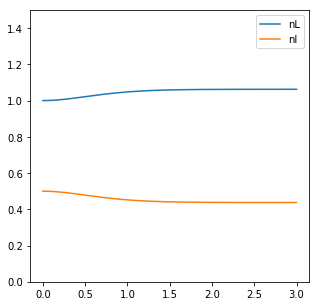

In [26]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
for k in ids("nL,nI"):
    yaxis=(sim.y_sol[i][k] for i in range(len(sim.y_sol)))
    ax.plot(sim.t_sol,np.fromiter(yaxis,dtype=np.float),label=labels[k])
ax.legend(loc=0)
ax.set_ylim(0.,1.5)
fig.canvas.draw()

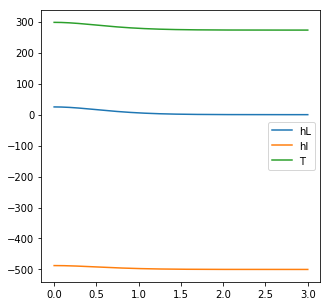

In [27]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
for k in ids("hL,hI,T"):
    yaxis=(sim.y_sol[i][k] for i in range(len(sim.y_sol)))
    ax.plot(sim.t_sol,np.fromiter(yaxis,dtype=np.float),label=labels[k])
ax.legend(loc=0)
fig.canvas.draw()

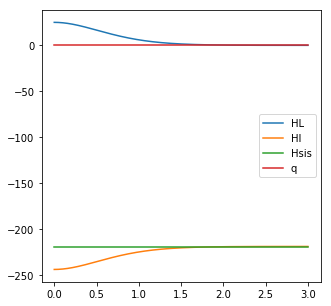

In [28]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
for k in ids("HL,HI,Hsis,q"):
    yaxis=(sim.y_sol[i][k] for i in range(len(sim.y_sol)))
    ax.plot(sim.t_sol,np.fromiter(yaxis,dtype=np.float),label=labels[k])
ax.legend(loc=0)
fig.canvas.draw()

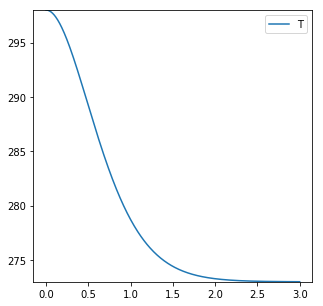

In [29]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
for k in ids("T"):
    yaxis=(sim.y_sol[i][k] for i in range(len(sim.y_sol)))
    ax.plot(sim.t_sol,np.fromiter(yaxis,dtype=np.float),label=labels[k])
ax.legend(loc=0)
ax.set_ylim(273.,298)
fig.canvas.draw()

In [30]:
#o sistema inicia acima de 273K
#tem um pouco de gelo quente
#o gelo vai derretendo e vai "consumindo calor" i.e. diminuindo a temperatura do sistema e transformando em energia interna da fase água
#não havendo fornecimento de calor de fora
#eventualmente a temperatura alcança 273K e o derretimento cessa